<a href="https://colab.research.google.com/github/joyc3lin/datasci_5_statistics/blob/main/HHA507week5assignmentPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import re
import numpy as np
import scipy
from scipy.stats import chi2_contingency, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Loading and Cleaning Datasets

## Dataset 1: Respiratory Symptoms and Treatment

In [18]:
df1 = pd.read_csv('data/respiratory_symptoms_and_treatment.csv')
df1

,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5.0,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,high
2,wheezing,6.0,male,Asthma,Mepolizumab,high
3,shortness of breath,7.0,male,Asthma,Mepolizumab,high
4,shortness of breath,9.0,male,Asthma,Mepolizumab,high
...,...,...,...,...,...,...
38532,A cough that lasts more than three weeks,45.0,female,Tuberculosis,ethambutol,high
38533,Loss of appetite and unintentional weight loss,43.0,female,Tuberculosis,ethambutol,high
38534,Fever,41.0,female,Tuberculosis,ethambutol,high
38535,Chills,53.0,female,Tuberculosis,ethambutol,high


In [19]:
#checking size
print(df1.shape)

(38537, 6)


In [20]:
# checking data types
for c in df1.columns:
  print(f"{c}: {type(df1[c][0])}")

Symptoms: <class 'str'>
Age: <class 'numpy.float64'>
Sex: <class 'str'>
Disease: <class 'str'>
Treatment: <class 'str'>
Nature: <class 'str'>


In [21]:
# looking for missing values
missing_values1 = df1.isnull().sum()
missing_values1

Symptoms      696
Age           342
Sex           922
Disease       340
Treatment    2841
Nature       2190
dtype: int64

In [22]:
# dropping row with missing data
df1.dropna(inplace=True)
df1.shape

(32724, 6)

In [23]:
# cleaning column names

# Function to remove white space and special characters from a value
def clean_value(value):
    cleaned_value = re.sub(r'\s+|[^a-zA-Z0-9]', '', str(value))
    return cleaned_value

df1.rename(mapper=clean_value, axis=1, inplace=True)
df1.shape

(32724, 6)

## Dataset 2: WHO Life Expectancy Data

In [6]:
df2 = pd.read_csv('data/Life_Expectancy_Data.csv')
df2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [24]:
#checking size
print(df2.shape)

(2938, 22)


In [25]:
# checking data types
for c in df2.columns:
  print(f"{c}: {type(df2[c][0])}")

Country: <class 'str'>
Year: <class 'numpy.int64'>
Status: <class 'str'>
Life expectancy : <class 'numpy.float64'>
Adult Mortality: <class 'numpy.float64'>
infant deaths: <class 'numpy.int64'>
Alcohol: <class 'numpy.float64'>
percentage expenditure: <class 'numpy.float64'>
Hepatitis B: <class 'numpy.float64'>
Measles : <class 'numpy.int64'>
 BMI : <class 'numpy.float64'>
under-five deaths : <class 'numpy.int64'>
Polio: <class 'numpy.float64'>
Total expenditure: <class 'numpy.float64'>
Diphtheria : <class 'numpy.float64'>
 HIV/AIDS: <class 'numpy.float64'>
GDP: <class 'numpy.float64'>
Population: <class 'numpy.float64'>
 thinness  1-19 years: <class 'numpy.float64'>
 thinness 5-9 years: <class 'numpy.float64'>
Income composition of resources: <class 'numpy.float64'>
Schooling: <class 'numpy.float64'>


In [26]:
# looking for missing values
missing_values2 = df2.isnull().sum()
missing_values2

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [27]:
# dropping row with missing data
df2.dropna(inplace=True)
df2.shape

(1649, 22)

In [28]:
# cleaning column names

# Function to remove white space and special characters from a value
def clean_value(value):
    cleaned_value = re.sub(r'\s+|[^a-zA-Z0-9]', '', str(value))
    return cleaned_value

df2.rename(mapper=clean_value, axis=1, inplace=True)
df2.shape

(1649, 22)

## Dataset 3: US Health Insurance

In [59]:
df3 = pd.read_csv('data/insurance.csv')
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [60]:
#checking size
print(df3.shape)

(1338, 7)


In [61]:
# checking data types
for c in df3.columns:
  print(f"{c}: {type(df3[c][0])}")

age: <class 'numpy.int64'>
sex: <class 'str'>
bmi: <class 'numpy.float64'>
children: <class 'numpy.int64'>
smoker: <class 'str'>
region: <class 'str'>
charges: <class 'numpy.float64'>


In [62]:
# looking for missing values
missing_values3 = df3.isnull().sum()
missing_values3

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [63]:
# cleaning column names

# Function to remove white space and special characters from a value
def clean_value(value):
    cleaned_value = re.sub(r'\s+|[^a-zA-Z0-9]', '', str(value))
    return cleaned_value

df3.rename(mapper=clean_value, axis=1, inplace=True)
df3.shape

(1338, 7)

# **Chi-Square Test**

## Hypothesis:

Null:

Alternative:

In [30]:
df1['Disease'].value_counts()

Pneumonia                                5280
bronchitis                               4338
chronic obstructive pulmonary disease    3648
Mesothelioma                             3168
Pneumothorax                             2448
bronchiolitis                            2050
Chronic Bronchitis                       1872
Influenza                                1872
Bronchiectasis                           1650
Pulmonary hypertension                   1584
Tuberculosis                             1344
Asthma                                    950
sleep apnea                               768
Acute Respiratory Distress Syndrome       576
Respiratory syncytial virus               528
Asbestosis                                432
Aspergillosis                             216
Name: Disease, dtype: int64

In [35]:
df1['Nature'].value_counts()

high      20647
medium    11664
low         413
Name: Nature, dtype: int64

In [34]:
contingency_table = pd.crosstab(df1['Disease'], df1['Nature'])
print(contingency_table)

Nature                                 high  low  medium
Disease                                                 
Acute Respiratory Distress Syndrome     264  144     168
Asbestosis                              336    0      96
Aspergillosis                            72  144       0
Asthma                                  502    0     448
Bronchiectasis                         1525    0     125
Chronic Bronchitis                     1056    0     816
Influenza                              1872    0       0
Mesothelioma                           3168    0       0
Pneumonia                                 0    0    5280
Pneumothorax                           2448    0       0
Pulmonary hypertension                 1584    0       0
Respiratory syncytial virus             528    0       0
Tuberculosis                           1344    0       0
bronchiolitis                          1375  125     550
bronchitis                              925    0    3413
chronic obstructive pulmonary d

In [36]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Counts: {expected}")

Chi2 value: 34213.092538888865
P-value: 0.0
Degrees of Freedom: 32
Expected Counts: [[3.63423542e+02 7.26952695e+00 2.05306931e+02]
 [2.72567657e+02 5.45214521e+00 1.53980198e+02]
 [1.36283828e+02 2.72607261e+00 7.69900990e+01]
 [5.99396467e+02 1.19896712e+01 3.38613861e+02]
 [1.04105702e+03 2.08241657e+01 5.88118812e+02]
 [1.18112651e+03 2.36259626e+01 6.67247525e+02]
 [1.18112651e+03 2.36259626e+01 6.67247525e+02]
 [1.99882948e+03 3.99823982e+01 1.12918812e+03]
 [3.33138247e+03 6.66373304e+01 1.88198020e+03]
 [1.54455006e+03 3.08954895e+01 8.72554455e+02]
 [9.99414741e+02 1.99911991e+01 5.64594059e+02]
 [3.33138247e+02 6.66373304e+00 1.88198020e+02]
 [8.47988265e+02 1.69622296e+01 4.79049505e+02]
 [1.29343448e+03 2.58724484e+01 7.30693069e+02]
 [2.73703355e+03 5.47486249e+01 1.54621782e+03]
 [2.30168243e+03 4.60403374e+01 1.30027723e+03]
 [4.84564723e+02 9.69270260e+00 2.73742574e+02]]


### Insights:



# **T-Test**

## Hypothesis:

Null:

Alternative:

In [39]:
len(df2)

1649

In [53]:
developing_data = df2[df2['Status'] == 'Developing']['Lifeexpectancy']
developed_data = df2[df2['Status'] == 'Developed']['Lifeexpectancy']
print(developing_data)
print(developed_data)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Lifeexpectancy, Length: 1407, dtype: float64
113     82.7
114     82.5
115     82.3
116     82.0
117     81.9
        ... 
2440    79.1
2506    82.3
2507    81.9
2508    81.7
2509    81.7
Name: Lifeexpectancy, Length: 242, dtype: float64


In [54]:
t_stat, p_val = ttest_ind(developing_data, developed_data, equal_var=False)

In [55]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -31.116782400253484
P-value: 1.7288343390823641e-128


In [56]:
developing_mean = developing_data.mean()
developed_mean = developed_data.mean()
print(developing_mean)
print(developed_mean)

67.68734896943853
78.69173553719008


In [57]:
print(f"Mean prevalence for developing countries: {developing_mean}")
print(f"Mean prevalence for developed conutries: {developed_mean}")

Mean prevalence for developing countries: 67.68734896943853
Mean prevalence for developed conutries: 78.69173553719008


### Insights:

# **ANOVA**

## Hypothesis:

Null:

Alternative:

In [64]:
#creating a new dataframe
df_new = df3[['smoker', 'region', 'bmi']]
df_new

,smoker,region,bmi
0,yes,southwest,27.900
1,no,southeast,33.770
2,no,southeast,33.000
3,no,northwest,22.705
4,no,northwest,28.880
...,...,...,...
1333,no,northwest,30.970
1334,no,northeast,31.920
1335,no,southeast,36.850
1336,no,southwest,25.800


In [66]:
model = ols('bmi ~ C(smoker) * C(region)', data=df_new).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                           sum_sq      df          F        PR(>F)
C(smoker)                8.973268     1.0   0.261646  6.090762e-01
C(region)             4064.154550     3.0  39.501459  1.878444e-24
C(smoker):C(region)     42.469983     3.0   0.412786  7.438464e-01
Residual             45612.876504  1330.0        NaN           NaN


### Insights:


# **Regression**

## Hypothesis:

Null:

Alternative:

In [78]:
df3 = df3[(df3['charges'] - df3['charges'].mean()) / df3['charges'].std() < 3]
df3 = df3[(df3['bmi'] - df3['bmi'].mean()) / df3['bmi'].std() < 3]

In [79]:
X = df3['charges']
y = df3['bmi']

In [80]:
X = sm.add_constant(X)

In [81]:
model2 = sm.OLS(y, X).fit()

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     49.13
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           3.80e-12
Time:                        00:04:19   Log-Likelihood:                -4233.8
No. Observations:                1327   AIC:                             8472.
Df Residuals:                    1325   BIC:                             8482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.3066      0.242    121.043      0.0

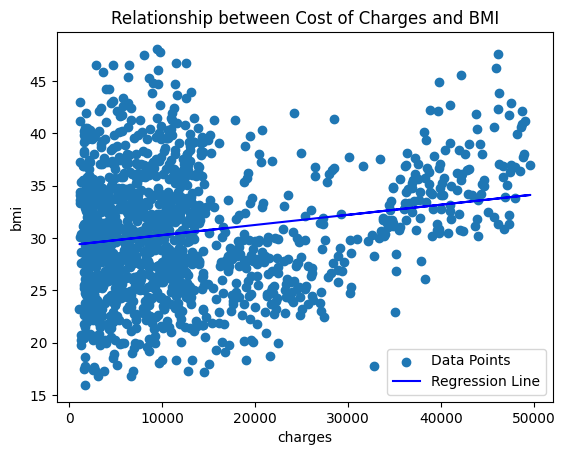

In [82]:
print(model2.summary())

plt.scatter(df3['charges'], df3['bmi'], label='Data Points')
plt.plot(df3['charges'], model2.predict(X), color='blue', label='Regression Line')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.title('Relationship between Cost of Charges and BMI')
plt.legend()
plt.show()

### Insights: